In [11]:
matplotlib inline

In [15]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.linear_model

In [2]:
df = pd.read_csv("train.csv")

### Data Exploration

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


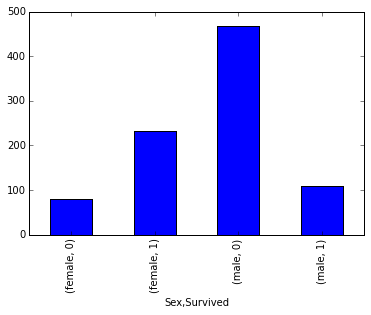

In [13]:
df.groupby(["Sex", "Survived"]).count()["PassengerId"].plot(kind="bar")

In [8]:
df["FareSquared"] = df["Fare"]**2

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareSquared
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,52.562500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,5081.308859
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,62.805625
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2819.610000
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,64.802500


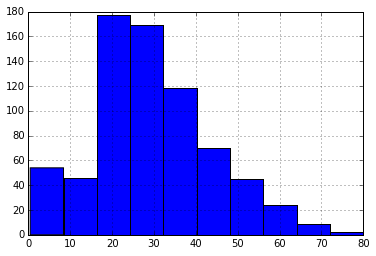

In [12]:
df["Age"].hist()

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareSquared
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,52.562500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,5081.308859
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,62.805625
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2819.610000
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,64.802500


In [38]:
clf = sklearn.linear_model.LogisticRegression()
DV = "Survived"
IVs = ["Age"]
subdata = df[[DV]+IVs].dropna()

In [39]:
subdata.head()

,Survived,Age
0,0,22
1,1,38
2,1,26
3,1,35
4,0,35


### Model Fitting

In [49]:
X = subdata[IVs]
Y = subdata[DV].values
clf.fit(X,Y)

In [56]:
predictions = clf.predict(X)

In [57]:
correct = [int(real == predicted) for real, predicted in zip(Y, predictions)]

In [58]:
np.mean(correct)

0.5938375350140056